## Description

This version is trained on predictions.csv, which contains LaFleur et al.'s base data. For X data, it onehot encodes base pairs in each element and appeneds them to a 2 dimensional array. It pads each element so that each element is the same length. This was a design decision that we changed later. The y data is the 'Observed log(TX/Txref)' which is normalized using sklearn's MinMaxScaler (from 0, high expression to 1, low expression).

Unlike the previous verions, this model uses a 4x4 kernal 

In [7]:
import pandas as pd
import numpy as np

In [8]:
# Load the Data

df = pd.read_csv('../predictions.csv')

In [9]:
# Normalize the y values

from sklearn.preprocessing import MinMaxScaler
df['Normalized Observed'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']])

In [10]:
# Define the function to onehot encode the input (x) sequences

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding


X = df[['UP', 'h35', 'spacs', 'h10', 'disc', 'ITR']]
y = df['Normalized Observed']

upstream_padding = {}
for col in X.columns:
    max_len = X[col].apply(len).max()
    upstream_padding[col] = np.array([padded_one_hot_encode('0' * (max_len - len(seq)) + seq) for seq in X[col]])

X = np.concatenate([upstream_padding[col] for col in X.columns], axis=1)

In [11]:
# Split the data into training and testing sets (80/20)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# stores the various input approaches
X_dict = {}

# stores split training/testing
train_test = {}

# stores the results
results = {}

# stores the models
models = {}

# stores the model history
model_history = {}

In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define CNN with kernal size of 4
models['CNN_kernal_4'] = Sequential()
models['CNN_kernal_4'].add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=X.shape[1:]))
models['CNN_kernal_4'].add(MaxPooling1D(pool_size=2))
models['CNN_kernal_4'].add(Conv1D(filters=64, kernel_size=4, activation='relu'))
models['CNN_kernal_4'].add(MaxPooling1D(pool_size=2))
models['CNN_kernal_4'].add(Flatten())
models['CNN_kernal_4'].add(Dense(64, activation='relu'))
models['CNN_kernal_4'].add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
models['CNN_kernal_4'].compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = models['CNN_kernal_4'].fit(X_train, 
                                     y_train, 
                                     epochs=150, 
                                     batch_size=32, 
                                     validation_data=(X_test, y_test))

# Evaluate the model
loss = models['CNN_kernal_4'].evaluate(X_test, y_test)

results['CNN_kernal_4'] = loss
model_history['CNN_kernal_4'] = history
models['CNN_kernal_4'].save('CNN_kernal_4.keras')


Epoch 1/150


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0253 - val_loss: 0.0085
Epoch 2/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0081 - val_loss: 0.0086
Epoch 3/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 4/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 5/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 6/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 7/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0067 - val_loss: 0.0075
Epoch 8/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0061 - val_loss: 0.0076
Epoch 9/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 10/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 11/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 12/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define CNN with kernal size of 4
models['CNN_kernal_4'] = Sequential()
models['CNN_kernal_4'].add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=X.shape[1:]))
models['CNN_kernal_4'].add(MaxPooling1D(pool_size=2))
models['CNN_kernal_4'].add(Conv1D(filters=64, kernel_size=4, activation='relu'))
models['CNN_kernal_4'].add(MaxPooling1D(pool_size=2))
models['CNN_kernal_4'].add(Flatten())
models['CNN_kernal_4'].add(Dense(64, activation='relu'))
models['CNN_kernal_4'].add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
models['CNN_kernal_4'].compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = models['CNN_kernal_4'].fit(X_train, 
                                     y_train, 
                                     epochs=150, 
                                     batch_size=32, 
                                     validation_data=(X_test, y_test))

# Evaluate the model
loss = models['CNN_kernal_4'].evaluate(X_test, y_test)

results['CNN_kernal_4'] = loss
model_history['CNN_kernal_4'] = history
models['CNN_kernal_4'].save('CNN_kernal_4.keras')


Epoch 1/150


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0253 - val_loss: 0.0085
Epoch 2/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0081 - val_loss: 0.0086
Epoch 3/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 4/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 5/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 6/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 7/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0067 - val_loss: 0.0075
Epoch 8/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0061 - val_loss: 0.0076
Epoch 9/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 10/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 11/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 12/150
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [19]:
print(loss)

0.009844223968684673


In [20]:
# Make predictions for the test set to visualize the results

our_prediction_dict = {}

for i in range(len(X)):
    our_prediction_dict[i] = models['CNN_kernal_4'].predict(np.array([X[i]]))[0][0]
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [21]:
our_prediction = pd.DataFrame.from_dict(our_prediction_dict, orient='index', columns=['Value'])
observed = df['Normalized Observed']

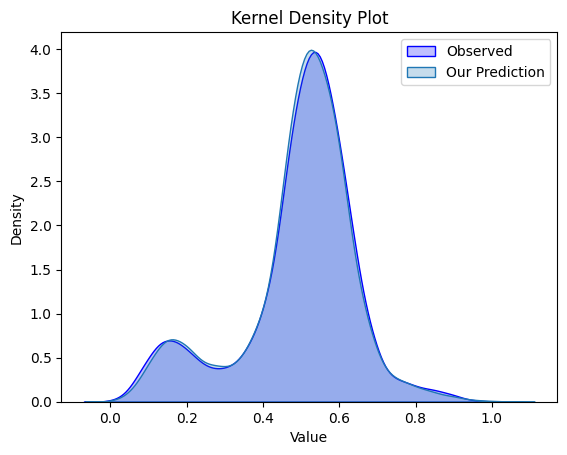

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(observed, fill=True, color='blue', label='Observed')
sns.kdeplot(our_prediction, fill=True, color='green', label='Our Prediction')

plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [34]:
our_prediction.shape

(13341,)

In [35]:
print(our_prediction[0])

0.29013002


In [38]:
incorrect_bins = 0
MAE = 0

for i in range(len(our_prediction)):
    if abs(our_prediction[i] - observed[i]) > 0.1:
        incorrect_bins += 1
    MAE += abs(our_prediction[i] - observed[i])

MAE = MAE / len(our_prediction)
print(f'MAE: {MAE}')
print(f'Incorrect Bins: {incorrect_bins} / {len(our_prediction)}')

MAE: 0.025816221152778866
Incorrect Bins: 665 / 13341


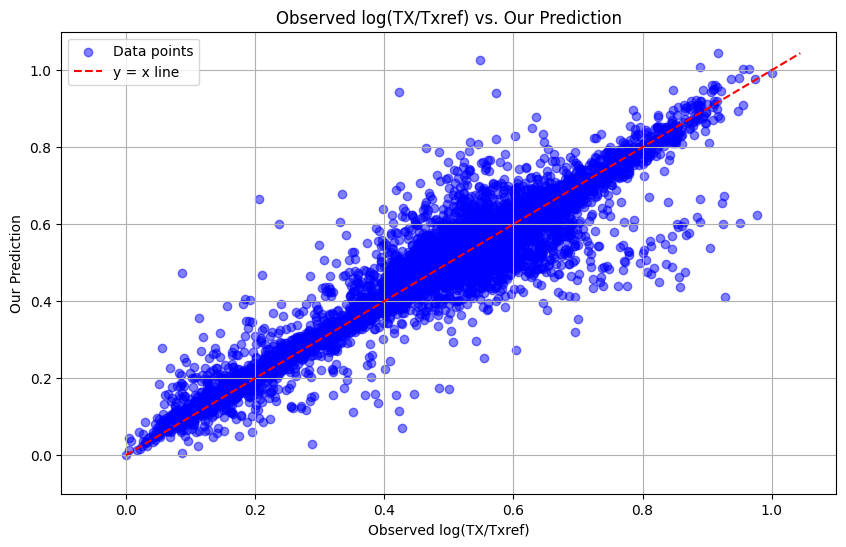

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `our_prediction` and `observed` are already defined
our_prediction = np.ravel(our_prediction)

plt.figure(figsize=(10, 6))
plt.scatter(observed, our_prediction, color='blue', alpha=0.5, label='Data points')

# Adding the y = x line
min_val = min(min(observed), min(our_prediction))
max_val = max(max(observed), max(our_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x line')

plt.title('Observed log(TX/Txref) vs. Our Prediction')
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Our Prediction')
plt.legend()
plt.grid(True)

# Setting axis limits
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.show()


In [33]:
X[0]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0,